In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
mean_01=np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


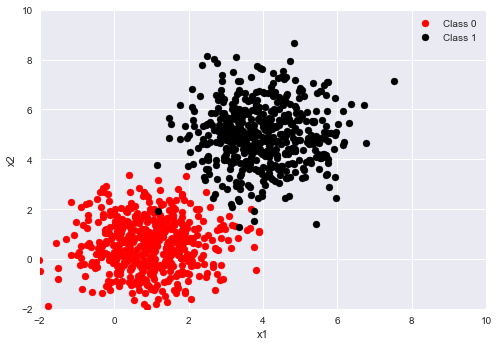

In [3]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red',label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='black',label='Class 1')
plt.xlim(-2,10)
plt.ylim(-2,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Splitting the data in training and testing

In [4]:
data=np.zeros((1000,3))
data.shape

(1000, 3)

In [5]:
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[500:,-1]=1.0
np.random.shuffle(data)
print(data[:10])

[[ 4.44463977  3.65240528  1.        ]
 [ 5.45216176  6.6646243   1.        ]
 [ 1.82742613  1.90239198  0.        ]
 [ 5.29875051  3.86266802  1.        ]
 [ 1.15615917  3.77771205  1.        ]
 [ 0.52393509 -1.65598734  0.        ]
 [ 2.5407575   3.39169585  1.        ]
 [ 4.72880994  6.20925547  1.        ]
 [ 4.65877327  6.62806012  1.        ]
 [ 1.04010134 -0.6766136   0.        ]]


In [6]:
split=int(0.8*data.shape[0])
print(split)

800


In [7]:
x_train=data[:split,:2]
x_test=data[split:,:2]

y_train=data[:split,2]
y_test=data[split:,2]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(800, 2) (800,) (200, 2) (200,)


# Logistic Regression

In [51]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [52]:
def sigmoid(hx):
    return 1.0/(1.0+np.exp(-1.0*hx))

In [53]:
def error(x,w,b,y):
    err=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/x.shape[0]

In [54]:
def predict(x,w,b):
    confidence_interval=hypothesis(x,w,b)
    if confidence_interval<0.5:
        return 0
    else:
        return 1


In [55]:
def accuracy(x_tst,y_tst,w,b):
    y_pred=[]
    for i in range(x_tst.shape[0]):
        y_pred.append(predict(x_tst[i],w,b))
    #y_pred=np.array(y_pred)
    return float((y_pred==y_tst).sum())/x_tst.shape[0]

In [56]:
def gradient(x,w,b,y):
    grad_b=0.0
    grad_w=np.zeros(w.shape)
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y[i]-hx)*x[i]
        grad_b+=(y[i]-hx)
    grad_b/=x.shape[0]
    grad_w/=x.shape[0]
    return [grad_w,grad_b]

In [57]:
def gradient_descent(x,w,b,y,learning_rate=0.001):
    err=error(x,w,b,y)
    [grad_w,grad_b]=gradient(x,w,b,y)
    w+=learning_rate*grad_w
    b+=learning_rate*grad_b
    return err,w,b

In [58]:
loss=[]
acc=[]

w=2*np.random.random((x_train.shape[1],))
b = 5*np.random.random()

In [59]:
for i in range(1000):
    l,w,b=gradient_descent(x_train,w,b,y_train,learning_rate=0.1)
    loss.append(l)
    acc.append(accuracy(x_test,y_test,w,b))

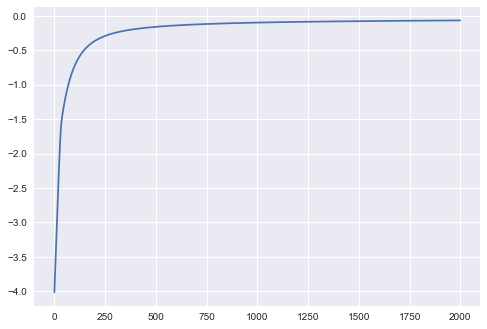

In [42]:
plt.plot(loss)
plt.show()

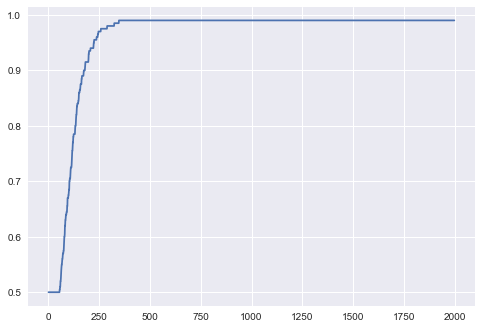

In [43]:
plt.plot(acc)
plt.show()

In [47]:
print(acc[-1])
print(w)
print(b)

0.99
[1.10655283 1.71195265]
-6.969321421591597


# Plottimng a hyperplane on a decision boundary

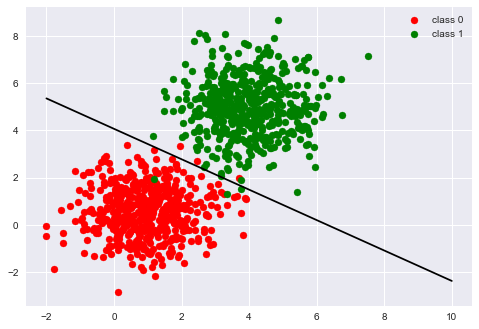

In [50]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='r',label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green',label='class 1')
x=np.linspace(-2,10,10)
y=-(b+w[0]*x)/w[1]
plt.plot(x,y,color='black')
plt.legend()
plt.show()